In [90]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.metrics import *
import pickle
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier


In [84]:
df= pd.read_csv('ClfData.csv')

In [85]:
df

,Unnamed: 0,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
0,0,Otro Trago,"Sech, Darell, Nicky Jam, Ozuna & Anuel AA",spotify:track:4bTZeO72FwMa6wKOiqoynL,0.725,0.790,0,-2.331,1,0.1970,0.0711,0.000001,0.0602,0.7630,175.988,287773,4,26.21403,14,1,2010
1,1,Lucille,The Everly Brothers,spotify:track:5C9ZW69WIoyEGg7QGJaIWI,0.522,0.672,0,-12.882,1,0.0393,0.4790,0.000584,0.0853,0.9650,124.165,152067,4,74.47293,6,1,1960
2,2,I Wish,Jo Dee Messina,spotify:track:3KW1FwspaOaaqLvcF8vSsS,0.389,0.515,7,-6.224,1,0.0300,0.3880,0.000000,0.0802,0.1640,70.136,213547,4,33.37201,9,1,2000
3,3,Arrival at Aslan's How - Score,Harry Gregson-Williams,spotify:track:1SZPluGCxfq0d135kMBaDZ,0.149,0.151,6,-17.530,1,0.0379,0.9420,0.988000,0.0846,0.0311,90.979,173293,3,51.76185,8,0,2000
4,4,Significas Todo Para Mi,Alberto Vazquez,spotify:track:3RxrbM6Q81aC1ycwzzSqMC,0.263,0.417,7,-4.937,0,0.0329,0.8240,0.000008,0.3890,0.3990,73.817,161146,1,94.84050,8,0,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41101,41101,Storms in Africa - Pt. II,Enya,spotify:track:1uQVrfQXsCDaGvjt6qDOWv,0.475,0.463,1,-18.689,1,0.0444,0.7620,0.930000,0.1740,0.5280,104.050,180837,4,46.80989,9,0,1980
41102,41102,"Honey, Honey",ABBA,spotify:track:2KgGzC2tP6DYbatyvdap3O,0.473,0.804,5,-7.697,1,0.0473,0.3240,0.000002,0.3930,0.7350,140.550,176467,4,31.09902,8,1,1970
41103,41103,International (Link IV),Peter Thomas,spotify:track:1H1n87rnntgQa7pUmdy1ow,0.533,0.240,4,-12.663,0,0.0457,0.1350,0.977000,0.0570,0.0000,91.720,15629,4,0.00000,0,0,1960
41104,41104,Veracruz,Javier Solís,spotify:track:1lG5Wj2R70mvV9MxsTxQma,0.542,0.379,9,-10.335,0,0.0338,0.7070,0.001150,0.2370,0.6500,118.203,161013,4,43.96417,11,0,1960


In [86]:
df = df.drop(df.columns[[0, 1]], axis=1)
df = df.drop(['mode'], axis=1)
df = df.drop(['time_signature'], axis=1)
df = df.drop(['key'], axis=1)
for c in df.columns:
  if (type(df[c][0]) != type('str') and c!='target'):
    maxa = df[c].max()
    mina = df[c].min()
    df[c] = df[c].apply(lambda x : (x - mina) / (maxa - mina))
x = df.drop(['target'],axis=1)
y = df[['target']]
for c in x.columns:
  if (type(x[c][0]) == type('str')):
    x=x.drop([c],axis=1)


In [95]:
traininput, testinput, trainoutput, testoutput = train_test_split(x, y, train_size=0.8, shuffle=True, random_state=1)

In [96]:
loreg = LogisticRegression()
loreg.fit(traininput, trainoutput)
print(loreg.score(testinput,testoutput))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7402091948431039


In [97]:
pickle.dump(loreg, open("loreg.pkl", "wb"))

In [98]:
print(classification_report(testoutput, loreg.predict(testinput)))

              precision    recall  f1-score   support

           0       0.79      0.65      0.71      4071
           1       0.71      0.83      0.76      4151

    accuracy                           0.74      8222
   macro avg       0.75      0.74      0.74      8222
weighted avg       0.75      0.74      0.74      8222



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


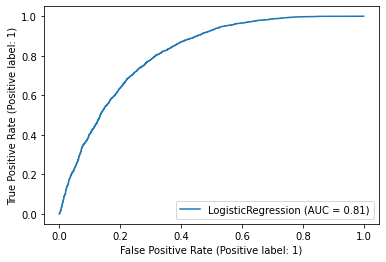

In [99]:
metrics.plot_roc_curve(loreg, testinput, testoutput)

In [100]:
gnb = GaussianNB()
gnb.fit(traininput, trainoutput)
print(gnb.score(testinput,testoutput))

0.7141814643639017


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [101]:
pickle.dump(gnb, open("gnb.pkl", "wb"))

In [102]:
print(classification_report(testoutput, gnb.predict(testinput)))

              precision    recall  f1-score   support

           0       0.83      0.53      0.65      4071
           1       0.66      0.89      0.76      4151

    accuracy                           0.71      8222
   macro avg       0.74      0.71      0.70      8222
weighted avg       0.74      0.71      0.70      8222



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


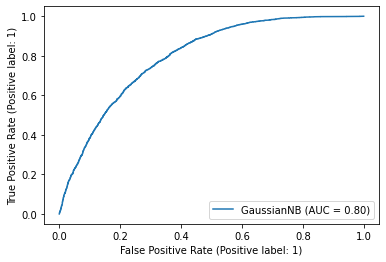

In [103]:
metrics.plot_roc_curve(gnb, testinput, testoutput)

In [104]:
dtc= DecisionTreeClassifier()
dtc.fit(traininput, trainoutput)
print(dtc.score(testinput,testoutput))

0.720749209438093


In [105]:
print(classification_report(testoutput, dtc.predict(testinput)))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      4071
           1       0.72      0.72      0.72      4151

    accuracy                           0.72      8222
   macro avg       0.72      0.72      0.72      8222
weighted avg       0.72      0.72      0.72      8222



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


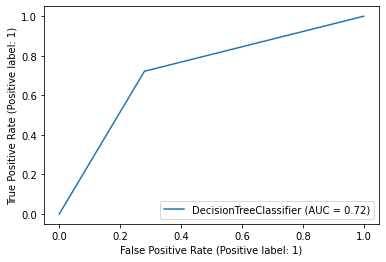

In [106]:
metrics.plot_roc_curve(dtc, testinput, testoutput)

In [107]:
pickle.dump(dtc, open("dtc.pkl", "wb"))

In [30]:
rfc = RandomForestClassifier()
rfc.fit(traininput, trainoutput)
print(rfc.score(testinput,testoutput))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8077359714563737


In [62]:
print(classification_report(testoutput, rfc.predict(testinput)))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80      6170
           1       0.78      0.86      0.82      6162

    accuracy                           0.81     12332
   macro avg       0.81      0.81      0.81     12332
weighted avg       0.81      0.81      0.81     12332



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


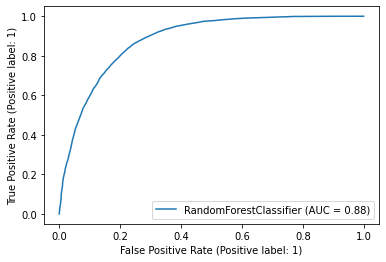

In [52]:
metrics.plot_roc_curve(rfc, testinput, testoutput)

In [43]:
pickle.dump(rfc, open("rfc.pkl", "wb"))

In [108]:
svc = SVC()
svc.fit(traininput, trainoutput)
print(svc.score(testinput,testoutput))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7774264169301873


In [109]:
print(classification_report(testoutput, svc.predict(testinput)))

              precision    recall  f1-score   support

           0       0.85      0.66      0.75      4071
           1       0.73      0.89      0.80      4151

    accuracy                           0.78      8222
   macro avg       0.79      0.78      0.77      8222
weighted avg       0.79      0.78      0.77      8222



In [110]:
pickle.dump(svc, open("svc.pkl", "wb"))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


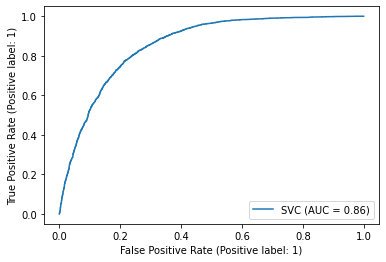

In [111]:
metrics.plot_roc_curve(svc, testinput, testoutput)

In [112]:
mlp = MLPClassifier()
mlp.fit(traininput, trainoutput)
print(mlp.score(testinput,testoutput))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7976161517878861


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [113]:
print(classification_report(testoutput, mlp.predict(testinput)))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78      4071
           1       0.77      0.86      0.81      4151

    accuracy                           0.80      8222
   macro avg       0.80      0.80      0.80      8222
weighted avg       0.80      0.80      0.80      8222



In [114]:
pickle.dump(mlp, open("mlp.pkl", "wb"))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


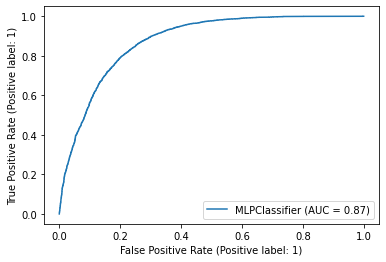

In [54]:
metrics.plot_roc_curve(mlp, testinput, testoutput)

In [47]:
gdc = GradientBoostingClassifier()
gdc.fit(traininput, trainoutput)
print(gdc.score(testinput,testoutput))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7960590334090172


In [65]:
print(classification_report(testoutput, gdc.predict(testinput)))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78      6170
           1       0.76      0.87      0.81      6162

    accuracy                           0.80     12332
   macro avg       0.80      0.80      0.80     12332
weighted avg       0.80      0.80      0.80     12332



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


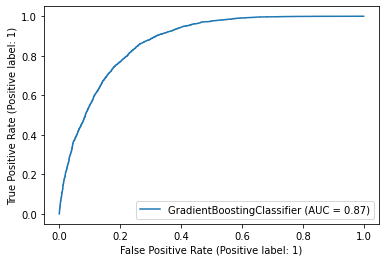

In [55]:
metrics.plot_roc_curve(gdc, testinput, testoutput)

In [48]:
pickle.dump(gdc, open("gdc.pkl", "wb"))

In [37]:
knn=KNeighborsClassifier()
knn.fit(traininput, trainoutput)
print(knn.score(testinput,testoutput))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.7560817385663315


In [66]:
print(classification_report(testoutput, knn.predict(testinput)))

              precision    recall  f1-score   support

           0       0.80      0.68      0.74      6170
           1       0.72      0.83      0.77      6162

    accuracy                           0.76     12332
   macro avg       0.76      0.76      0.75     12332
weighted avg       0.76      0.76      0.75     12332



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


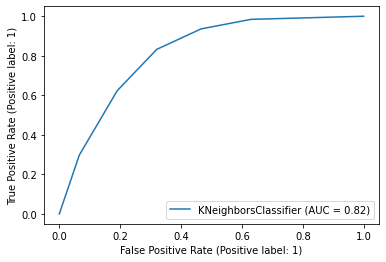

In [56]:
metrics.plot_roc_curve(knn, testinput, testoutput)

In [46]:
pickle.dump(knn, open("knn.pkl", "wb"))